In [ ]:
import requests
import json
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors

In [17]:
#global variables
parameters = {
    't': 'temperature',
    's': 'salinity',
    'o': 'oxygen',
    'O': 'o2sat',
    'A': 'AOU',
    'i': 'silicate',
    'p': 'phosphate',
    'n': 'nitrate'
}

parameters_name = {
    't': 'temperature',
    's': 'salinity',
    'o': 'dissolved oxygen',
    'O': 'percent oxygen saturation',
    'A': 'apparent oxygen utilization',
    'i': 'silicate',
    'p': 'phosphate',
    'n': 'nitrate'
}

units = {
    't': '°C',
    's': '',
    'o': 'µmol/kg',
    'O': '%',
    'A': 'µmol/kg',
    'i': 'µmol/kg',
    'p': 'µmol/kg',
    'n': 'µmol/kg'
}

time_periods = {
    '0': 'annual',
    '1': 'january',
    '2': 'february',
    '3': 'march',
    '4': 'april',
    '5': 'may',
    '6': 'june',
    '7': 'july',
    '8': 'august',
    '9': 'september',
    '10': 'october',
    '11': 'november',
    '12': 'december',
    '13': 'winter',
    '14': 'spring',
    '15': 'summer',
    '16': 'autumn'
}

grid_resolutions = {'01': '1.00', '04': '0.25'} 

In [18]:
# Define parameters for plot map 
grid_res = '04'  # Change this to '01' for 1-degree resolution, '04' for 0.25-degree
param = 't'
time_period = '0'  # Use numeric key as a string
test_var = 'mn'  # mean value
depth_threshold = 10

In [19]:
# Define the API URL and parameters
base_url = "https://eco.odb.ntu.edu.tw/api/woa23"
map_params = {
    "lon0": -179.9,
    "lat0": -89.9,
    "lon1": 179.9,
    "lat1": 89.9,
    "dep0": depth_threshold,
    "dep1": depth_threshold+1,
    "parameter": parameters[param[0]],
    "time_period": time_period,
    "append": test_var,
    "grid": grid_resolutions[grid_res]
}

# Fetch data from the API
response = requests.get(base_url, params=map_params)
map_data = response.json()


In [20]:
map_data

[{'lon': -179.875,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -179.625,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -179.375,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -179.125,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -178.875,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -178.625,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -178.375,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -178.125,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -177.875,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},
 {'lon': -177.625,
  'lat': -89.875,
  'depth': 10.0,
  'time_period': '0',
  'temperature': None},


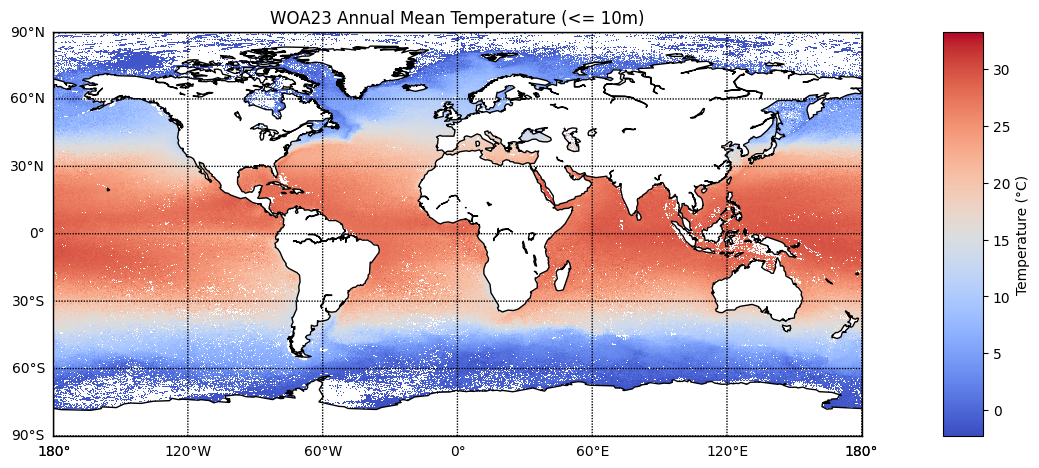

In [21]:
# Parse the JSON data into a structured format for map plot
lons = []
lats = []
values = []

for entry in map_data:
    lons.append(entry['lon'])
    lats.append(entry['lat'])
    values.append(entry[parameters[param]])

# Convert lists to numpy arrays
lons = np.array(lons)
lats = np.array(lats)
values = np.array(values, dtype=np.float32)

# Generate World Ocean Map Plot
fig, ax = plt.subplots(figsize=(12, 8))
m = Basemap(projection='cyl', lon_0=0, ax=ax)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(0., 360., 60.), labels=[0, 0, 0, 1])

# Convert longitude and latitude to meshgrid for plotting
unique_lons = np.unique(lons)
unique_lats = np.unique(lats)
lon_mesh, lat_mesh = np.meshgrid(unique_lons, unique_lats)

value_mesh = np.full(lon_mesh.shape, np.nan, dtype=np.float32)

# Populate the value_mesh
for i in range(len(lons)):
    lon_idx = np.where(unique_lons == lons[i])[0][0]
    lat_idx = np.where(unique_lats == lats[i])[0][0]
    value_mesh[lat_idx, lon_idx] = values[i]

# Plot the data
if param == 's':
    # Custom color scale for salinity
    levels = np.linspace(30, 40, 256)
    cmap = plt.get_cmap('coolwarm')
    norm = mcolors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    c_scheme = m.pcolormesh(lon_mesh, lat_mesh, value_mesh, cmap=cmap, norm=norm)
else:
    c_scheme = m.pcolormesh(lon_mesh, lat_mesh, value_mesh, shading='auto', cmap='coolwarm')

cbar = m.colorbar(c_scheme, location='right', pad="10%")
cbar.set_label(f'{parameters_name[param[0]].title()} ({units[param]})')

plt.title(f'WOA23 {time_periods[time_period].title()} Mean {parameters_name[param[0]].title()} (<= {depth_threshold}m)')
plt.show()

In [24]:
# Define parameters for plot map 
grid_res = '04'  # Change this to '01' for 1-degree resolution, '04' for 0.25-degree
param = 's'
time_period = '0'  # Use numeric key as a string
test_var = 'mn'  # mean value
depth_threshold = 300

In [25]:
# Define the API URL and parameters for profile plot
profile_params = {
    "lon0": 118,
    "lat0": 22,
    "lon1": 128,
    "lat1": 22,
    "dep0": 0,
    "dep1": depth_threshold+1,
    "parameter": parameters[param[0]],
    "time_period": time_period,
    "append": test_var,
    "grid": grid_resolutions[grid_res]
}

# Fetch data from the API for profile plot
response = requests.get(base_url, params=profile_params)
profile_data = response.json()
profile_data

[{'lon': 118.125,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 33.96763610839844},
 {'lon': 118.375,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 34.04912185668945},
 {'lon': 118.625,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 33.89490509033203},
 {'lon': 118.875,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 34.0103645324707},
 {'lon': 119.125,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 34.01387023925781},
 {'lon': 119.375,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 34.060585021972656},
 {'lon': 119.625,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 33.96549987792969},
 {'lon': 119.875,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 34.0660400390625},
 {'lon': 120.125,
  'lat': 22.125,
  'depth': 0.0,
  'time_period': '0',
  'salinity': 34.01039505004883},
 {'lon': 120.375,
  'lat': 22.125,
  '

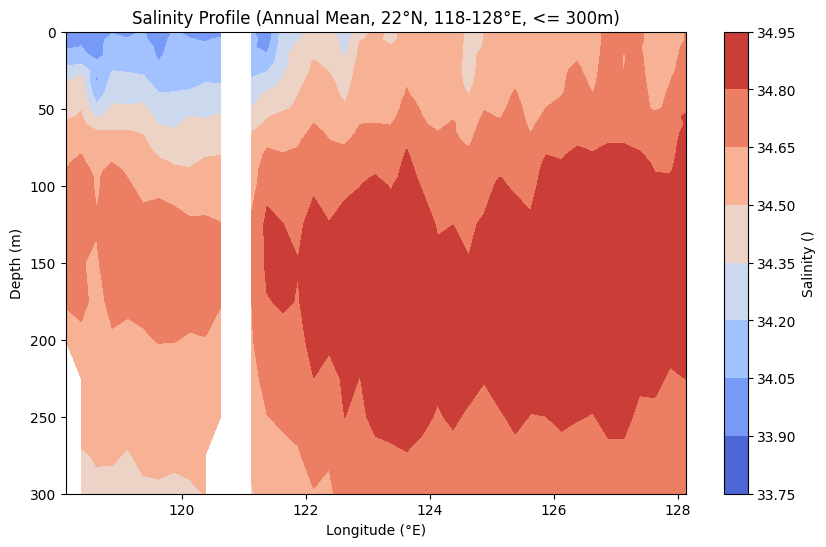

In [27]:
# Parse the JSON data into a structured format for profile plot
lons = []
depths = []
values = []

for entry in profile_data:
    lons.append(entry['lon'])
    depths.append(entry['depth'])
    values.append(entry[parameters[param]])

# Convert lists to numpy arrays
lons = np.array(lons)
depths = np.array(depths)
values = np.array(values, dtype=np.float32)

# Generate Profile Plot
fig, ax = plt.subplots(figsize=(10, 6))
unique_lons = np.unique(lons)
unique_depths = np.unique(depths)
x, y = np.meshgrid(unique_lons, unique_depths)
profile_mesh = np.full(x.shape, np.nan, dtype=np.float32)

# Populate the profile_mesh
for i in range(len(lons)):
    lon_idx = np.where(unique_lons == lons[i])[0][0]
    depth_idx = np.where(unique_depths == depths[i])[0][0]
    profile_mesh[depth_idx, lon_idx] = values[i]

# Plot the data
contour = ax.contourf(x, y, profile_mesh, cmap='coolwarm')

cbar = plt.colorbar(contour)
cbar.set_label(f'{parameters_name[param[0]].title()} ({units[param]})')

ax.invert_yaxis()
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Depth (m)')
plt.title(f'{parameters_name[param[0]].title()} Profile ({time_periods[time_period].capitalize()} Mean, {profile_params["lat0"]}°N, {profile_params["lon0"]}-{profile_params["lon1"]}°E, <= {profile_params["dep1"]}m)')
plt.show()